In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('/content/drive/MyDrive/python/churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [32]:
df.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


<ipython-input-33-1eb59550fc6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


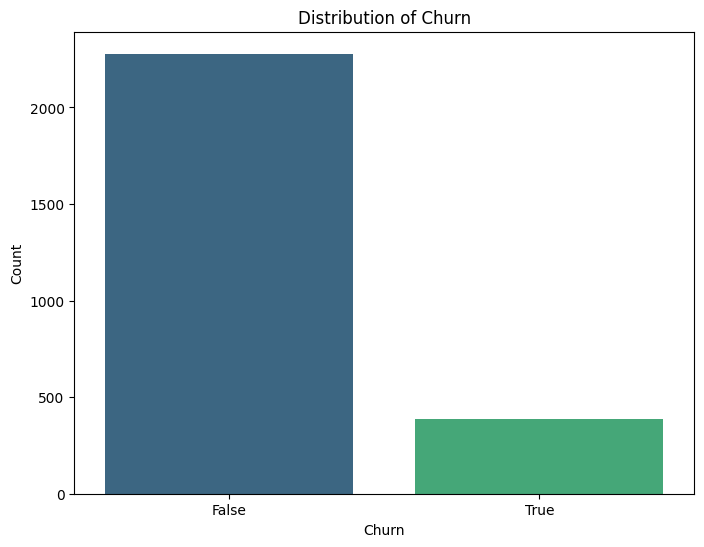

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

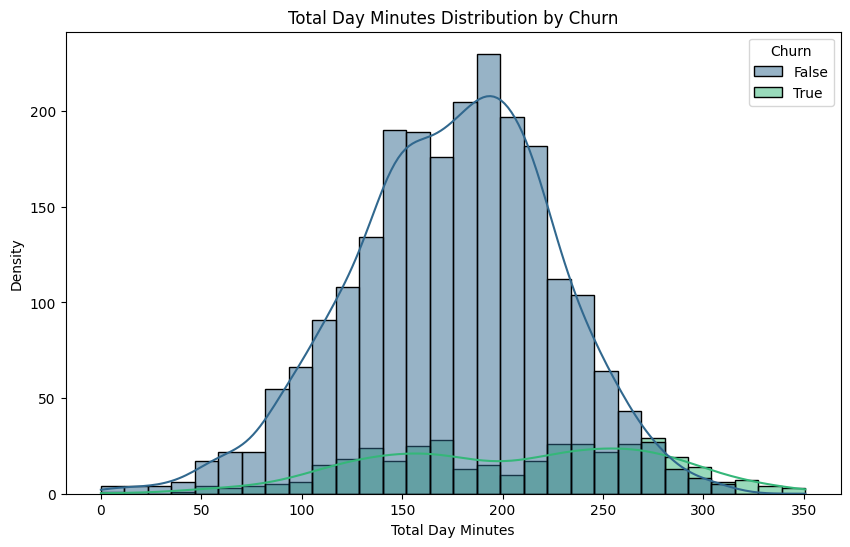

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total day minutes', hue='Churn', kde=True, palette='viridis', bins=30)
plt.title('Total Day Minutes Distribution by Churn')
plt.xlabel('Total Day Minutes')
plt.ylabel('Density')
plt.show()

<ipython-input-35-8403c21064a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Customer service calls', data=df, palette='viridis')


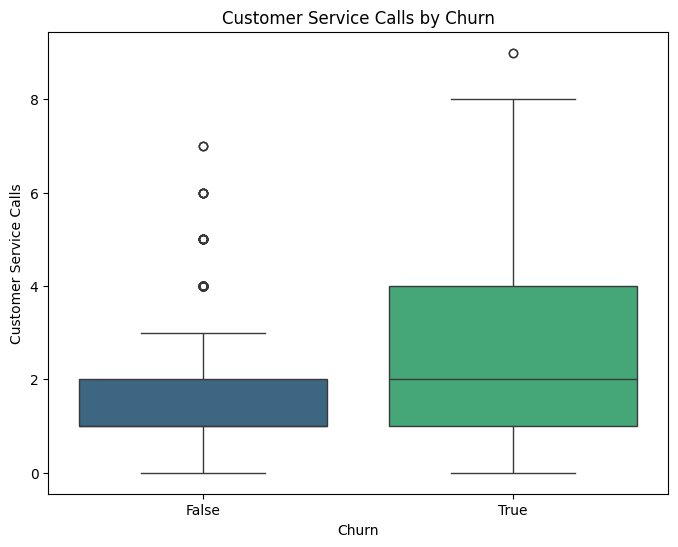

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Customer service calls', data=df, palette='viridis')
plt.title('Customer Service Calls by Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

In [36]:
df['Churn'] = df['Churn'].astype(int)

In [37]:
df = pd.get_dummies(df, columns=['State', 'International plan', 'Voice mail plan'], drop_first=True)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
                'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
                'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes',
                'Total intl calls', 'Total intl charge', 'Customer service calls']
df[num_features] = scaler.fit_transform(df[num_features])

In [39]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

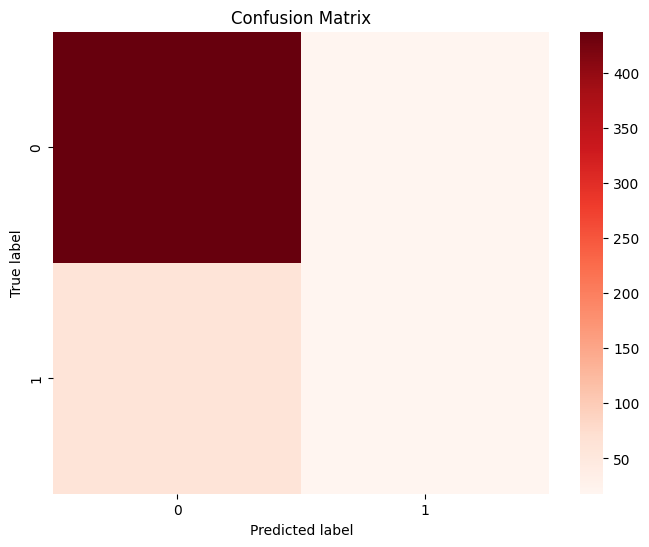

In [42]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, cmap="Reds")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       455
           1       0.50      0.23      0.31        79

    accuracy                           0.85       534
   macro avg       0.69      0.59      0.62       534
weighted avg       0.82      0.85      0.83       534

